In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
import glob
from scipy.optimize import curve_fit
import math
import
#!pip install dataframe-image

In [8]:
experiment_1 = '00001*.txt'
experiment_2 = '00002*.txt'
experiment_3 = '00003*.txt'
experiment_4 = '00004*.txt'
experiment_5 = '00005*.txt'

A NEW BEGINNING

1. Define a function that accepts a data filename and return a x as time, y as period[ms], decay time of period time, period time in the case of zero friction (as if the pendulum worked forever, reached an extremely small angle where friction is negligible). these parameters are the results of curve_fit to the function y = a**exp(-b*(t-d))+c 

2. Define a function that creates a graph (period as a function of time)


In [49]:
def extract_raw_period_vs_time(filename, cut_end):
    # input: datafile name
    # output: time [s], period [ms]
    df = pd.read_csv(filename, header=8, sep=' ', names =['d','time','state'])
    frame_period = df[df.state==1][0:cut_end:2].time.diff()[1:-1]
    t_time = (df[df.state==1][0:cut_end:2].time/1000)[2:]
    return t_time, frame_period

# input: time and period
# output: theoretical fitted parameters of the fitted equation y = a * exp(-b(x-c)) + d
def func(x,a,b,c,d):
    return a*np.exp(-b*(x-c))+d
    #if filename =='00005_03-2021-10-16-112229.txt':
    #[t_time, period] = extract_raw_period_vs_time(filename,-1)
    #popt, pcov = curve_fit(func, t_time, period, p0=[24,0, 0, 11000], method='lm', maxfev=5000)
    #nice_plot_period_vs_time(filename, t_time, period)


def nice_plot_period_vs_time(data_x, data_y):
    plt.scatter(data_x, data_y/1000)
    #plt.scatter(data_x, func(data_x, *popt))
    plt.ylabel('Period [s]', fontsize=16)
    plt.xlabel('Time [s]', fontsize=16)

def angle(x, l, unc):
    # x - distance from center from which the pendulum was released [m]
    # l - the Pendulum length [m]
    # unc - uncertainty in pendulum length [m]
    base = math.asin(x/l)*180/math.pi
    base_plus = abs(math.asin(x/(l+unc))*180/math.pi - base)
    base_minus = abs(math.asin(x/(l-unc))*180/math.pi - base)
    return (base, max(base_plus, base_minus))

PENDULUM_LENGTH = 31.5 # [m]
PENDULUM_LENGTH_UNCERTAINTY = 5 # [m]

#lengths = np.linspace(0.1,0.5, 5)
#for length in lengths:
#    angle_c, uncer = angle(length, 31.5, 4.5) 
#    print("Length {a:0.1f}[m]:, Angle: {b:0.2f}±{c:0.2f}[deg]".format(a=length, b=angle_c, c=uncer))

,index,Time_ms,Period_s,angle,experiment_no
0,0,26.506,11.102,0.18,1
1,1,37.611,11.111,0.18,1
2,2,48.700,11.105,0.18,1
3,3,59.835,11.089,0.18,1
4,4,70.926,11.135,0.18,1
...,...,...,...,...,...
243,16,203.545,11.098,0.91,11
244,17,214.655,11.108,0.91,11
245,18,225.758,11.110,0.91,11
246,19,236.864,11.103,0.91,11


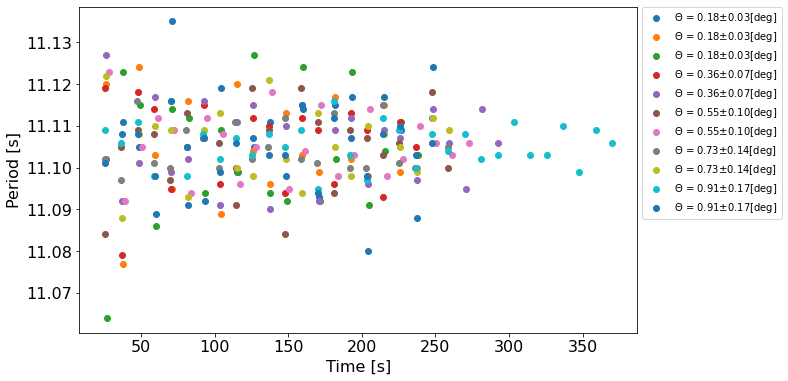

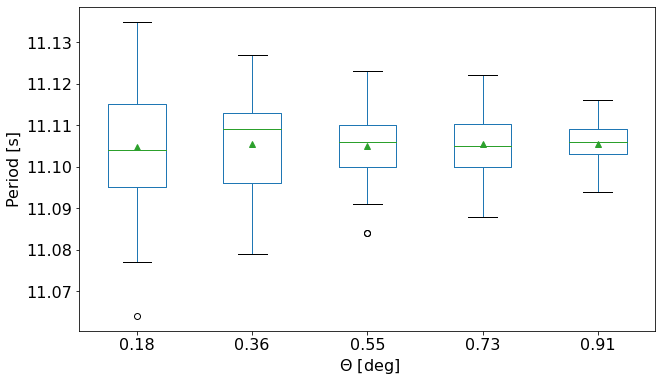

In [172]:
# Prepare clean from raw data for the experiment number 5 - super pendulum
filelist = []
for filename in glob.glob(experiment_5):
    filelist.append(filename)
filelist = sorted(filelist)

lengths = [0.1, 0.1, 0.1, 0.2, 0.2, 0.3,0.3,0.4,0.4,0.5,0.5]
angles = []
uncers = []
for length in lengths:
    angle_c, uncer = angle(length, PENDULUM_LENGTH, PENDULUM_LENGTH_UNCERTAINTY) 
    angles.append(round(angle_c,2))
    uncers.append(round(uncer, 2))

# First three experiments are for pendulum extension of 0.1 m
pendulum_extension = 0.1 #[m]
frame_period_mean=[]
frame_period_std=[]
df_array=[]
plt.figure(figsize=(10,6))
for i in range(11):
    t_time, frame_period = extract_raw_period_vs_time(filelist[i], -1)
    nice_plot_period_vs_time(t_time, frame_period);
    angle_c, uncer = angle(pendulum_extension, PENDULUM_LENGTH, PENDULUM_LENGTH_UNCERTAINTY)
    
    # Clean data - take the mean for the three experiments and populate a corresponding data frame
    frame_period_mean.append(np.mean(frame_period))
    frame_period_std.append(np.std(frame_period))
    
    df_array.append(pd.DataFrame({'Time_ms':np.array(t_time), 'Period_s':np.array(frame_period/1000), 'angle': angles[i], 'experiment_no': i+1}))

# Raw data
lgd = plt.legend(["$\Theta$ = {b:0.2f}±{c:0.2f}[deg]".format(b=angles[i], c=uncers[i]) for i in range(11)],
          bbox_to_anchor=(1,1.015), loc="upper left")
plt.savefig('figure_period_vs_time_super_pendulum.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

# construct the dataframe to hold the clean data
df_final = pd.concat(df_array).reset_index()

#bplot = df_final.boxplot(column=['Period_s'], by=['angle','experiment_no'], figsize=(20,6), grid=False);
bplot = df_final.boxplot(column=['Period_s'], by=['angle'], figsize=(10,6), grid=False, showmeans=True);
bplot.set_ylabel('Period [s]', fontsize=16)
bplot.set_xlabel(' $\Theta$ [deg]', fontsize=16)
bplot.set_title('');
plt.suptitle('')
plt.savefig('figure_period_vs_angle_box_plot_super_pendulum.png', dpi=300)

#print(np.mean(frame_period_mean))
#print(np.mean(frame_period_std))
df_final

In [167]:
#!pip install dataframe-image

import dataframe_image as dfi
 
 
#dfi.export(df, 'dataframe.png')


In [171]:
dfi.export(df_final.groupby("angle")["Period_s"].describe(), 'super_pendulum_results_df.png')
dfi.export(df_final.groupby(["experiment_no", "angle"])["Period_s"].describe(), 'super_pendulum_results_experiment_no_df.png')

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

In [120]:
T=11.111 
L_theory = 9.8*(T/(2*math.pi))**2
print("Length of the string from theoretical calculation based on period of {} s is: {} [m]".format(T, L_theory))

Length of the string from theoretical calculation based on period of 11.111 s is: 30.645917927228748 [m]


Experiment 1

00001_06-2021-10-05-183944.txt
00001_08-2021-10-05-184240.txt
00001_09-2021-10-05-184355.txt
00001_07-2021-10-05-184133.txt
00001_04-2021-10-05-183643.txt
00001_05-2021-10-05-183820.txt


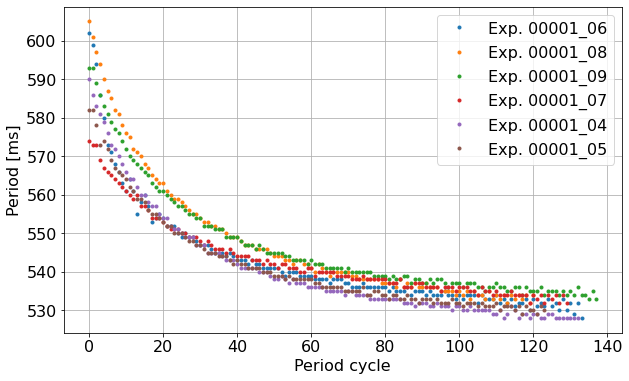

In [121]:
for filename in glob.glob(experiment_1):
    df = pd.read_csv(filename, header=8, sep=' ', names =['d','time','state'])
    print(filename)
    frame1 = df[df.state==1][0:-25:2].time.diff()[1:-1]
    frame2 = df[df.state==1][1:-25:2].time.diff()[1:-1]
    total_frames = [frame1, frame2]
    final_df = pd.concat(total_frames)
    final_df.sort_index().reset_index(drop=True).plot(ms=3, marker='o', lw=0, figsize=(10,6));

plt.ylabel('Period [ms]', fontsize=16)
plt.xlabel('Period cycle', fontsize=16)
#plt.title('Pendulum period as a function of pendulum cycle no.', fontsize=16)
plt.legend(['Exp. ' + file[:-22] for file in glob.glob(experiment_1)], fontsize=16)
plt.grid()
plt.savefig('figure_period_vs_periodcount.png', dpi=300)

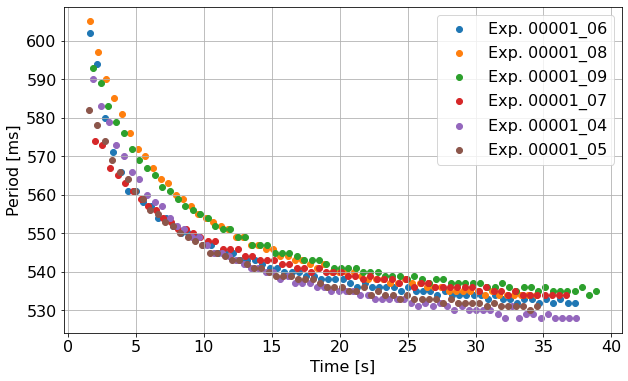

In [122]:
plt.figure(figsize=(10, 6))
for filename in glob.glob(experiment_1):
    df = pd.read_csv(filename, header=8, sep=' ', names =['d','time','state'])
    frame_period = df[df.state==1][0:-25:2].time.diff()[1:-1]
    t_time = (df[df.state==1][0:-25:2].time/1000)[2:]
    #frame1.plot(ms=3, marker='o', lw=0, figsize=(10,6));
    plt.scatter(t_time, frame_period)

plt.ylabel('Period [ms]', fontsize=16)
plt.xlabel('Time [s]', fontsize=16)
#plt.title('Pendulum period as a function of pendulum cycle no.', fontsize=16)
plt.legend(['Exp. ' + file[:-22] for file in glob.glob(experiment_1)], fontsize=16)
plt.grid()

In [123]:
from scipy.optimize import curve_fit
import scipy

[2.78902143e+01 1.35339461e-01 5.31226158e+02 5.69195871e+00]
[[ 6.59996316e+11 -9.55417639e+01 -9.37933386e+03 -1.74849830e+11]
 [-9.55417514e+01  8.67774392e-06  5.57187579e-04  2.53112382e+01]
 [-9.37933243e+03  5.57187579e-04  5.72016615e-02  2.48480461e+03]
 [-1.74849830e+11  2.53112434e+01  2.48480499e+03  4.63221721e+10]]


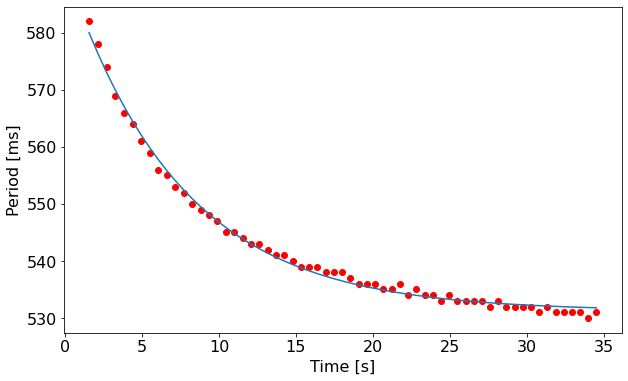

In [124]:
def func(x,a,b,c,d):
    return a*np.exp(-b*(x-d))+c

data_y = np.array(frame_period)
data_x = np.array(t_time)
popt, pcov = curve_fit(func, data_x, data_y, p0=[20,0, 20, 0], method='lm', maxfev=2000)
plt.figure(figsize=(10, 6))
plt.scatter(data_x, data_y, color='r')
plt.plot(data_x, func(data_x, *popt))
plt.ylabel('Period [ms]', fontsize=16)
plt.xlabel('Time [s]', fontsize=16)

print(popt)
print(pcov)

In [125]:
1/1.35e-01

7.4074074074074066

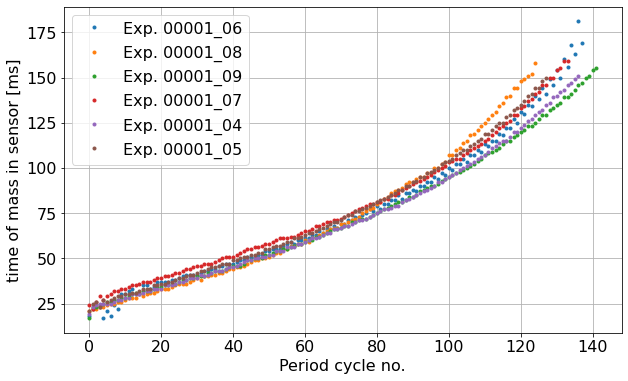

In [126]:
for filename in glob.glob(experiment_1):
    df = pd.read_csv(filename, header=8, sep=' ', names =['d','time','state'])
    time_in_sensor_df = df[(df.state==1) | (df.state==2)].time.diff()[1:-48:2].reset_index(drop=True)
    time_in_sensor_df.plot(marker='.',lw=0, figsize=(10,6))

plt.ylabel('time of mass in sensor [ms]', fontsize=16)
plt.legend(['Exp. ' + file[:-22] for file in glob.glob(experiment_1)], fontsize=16)
plt.xlabel('Period cycle no.', fontsize=16)
plt.grid()
plt.savefig('figure_time_of_mass_in_sensor_vs_periodcount.png', dpi=300)

Mass speed as function of period cycle
Mass width = 0.022 +- 0.001 meters

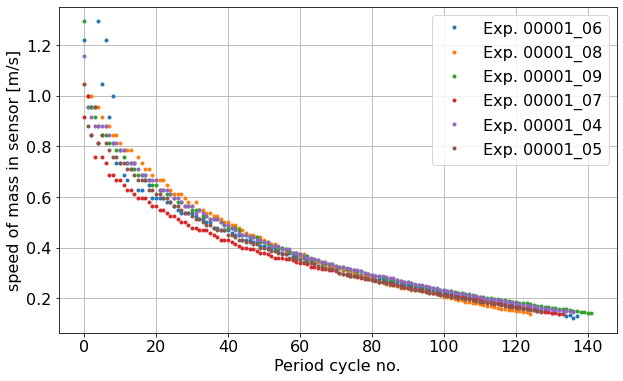

In [127]:
0.001/(1/3600)
mass_width = 0.022 # meters
for filename in glob.glob(experiment_1):
    df = pd.read_csv(filename, header=8, sep=' ', names =['d','time','state'])
    time_in_sensor_df = df[(df.state==1) | (df.state==2)].time.diff()[1:-48:2].reset_index(drop=True)
    speed_mass_in_sensor_df = (mass_width/(time_in_sensor_df/1000)) # times 3.6 to convert from m/s to km/h
    speed_mass_in_sensor_df.plot(marker='.',lw=0, figsize=(10,6))

plt.ylabel('speed of mass in sensor [m/s]', fontsize=16)
plt.legend(['Exp. ' + file[:-22] for file in glob.glob(experiment_1)], fontsize=16)
plt.xlabel('Period cycle no.', fontsize=16)
plt.grid()
plt.savefig('figure_mass_speed_in_sensor_vs_periodcount.png', dpi=300)

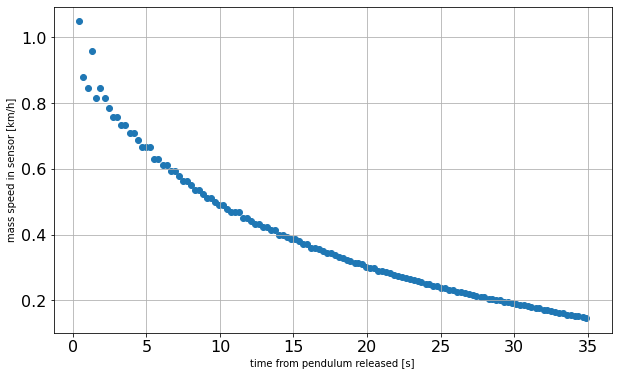

In [128]:
time_from_start_df = df[(df.state==1) | (df.state==2)].time[1:-48:2].reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.scatter(time_from_start_df/1000, speed_mass_in_sensor_df)
plt.xlabel('time from pendulum released [s]')
plt.ylabel('mass speed in sensor [km/h]')
plt.grid()

Experiment 2 - period as a function of release angle

In [129]:
filelist = sorted(glob.glob(experiment_2))
angles =[60, 60, 70, 70, 80, 80, 100, 100, 20, 20, 30,30, 40, 40]

In [130]:
mass_time = []
for filename in filelist:
    df = pd.read_csv(filename, sep =' ', header='infer', skiprows=10, names=['d', 'time', 'state'])
    #print(df.time[3]-df.time[1])
    mass_time.append(df.time[3]-df.time[1])
mass_time_np = np.array(mass_time)

In [131]:
#calculate mean 
mass_width = 0.017 # in meters
angles_mean = np.reshape(angles, (7,2)).mean(axis=1)
mass_time_mean = np.reshape(mass_time_np, (7,2)).mean(axis=1)

df = pd.read_csv('000002_08-2021-10-06-175147.txt', sep =' ', header='infer', skiprows=10, names=['d', 'time', 'state'])

angles_mean = np.append(angles_mean, 90)
mass_time_mean = np.append(mass_time_mean, df.time[3]-df.time[1])

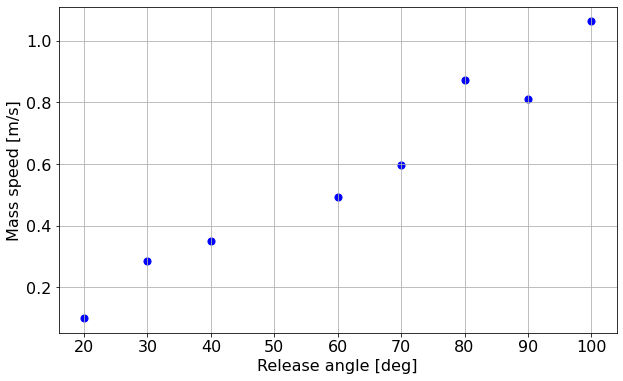

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(angles_mean, mass_width / (mass_time_mean/1000), s=50, color='blue');
plt.ylabel('Mass speed [m/s]', fontsize=16)
plt.xlabel('Release angle [deg]', fontsize=16)
plt.grid()
plt.savefig('figure_mass_speed_in_sensor_vs_release_angle.png', dpi=300)

In [133]:
mass_width / (mass_time_mean/1000)

array([0.49275362, 0.59649123, 0.87179487, 1.0625    , 0.10029499,
       0.28571429, 0.35051546, 0.80952381])

In [134]:
angles_mean


array([ 60.,  70.,  80., 100.,  20.,  30.,  40.,  90.])

Experiment 3 - Period as function of pendulum height

In [135]:
filelist = sorted(glob.glob(experiment_3))
Height =[0.082, 0.082, 0.082, 0.067, 0.067, 0.055, 0.055]

In [136]:
period = []
for filename in filelist:
    df = pd.read_csv(filename, sep =' ', header='infer', skiprows=10, names=['d', 'time', 'state'])
    #print(df.time[3]-df.time[1])
    period.append(df.time[10]-df.time[2])
period

[593, 585, 602, 552, 562, 547, 537]

In [137]:
#calculate_mean
period_mean = []
period_mean.append(np.mean(period[0:2]))
period_mean.append(np.mean(period[3:4]))
period_mean.append(np.mean(period[5:6]))
height_final = [0.082,0.071,0.0615]
period_mean

[589.0, 552.0, 547.0]

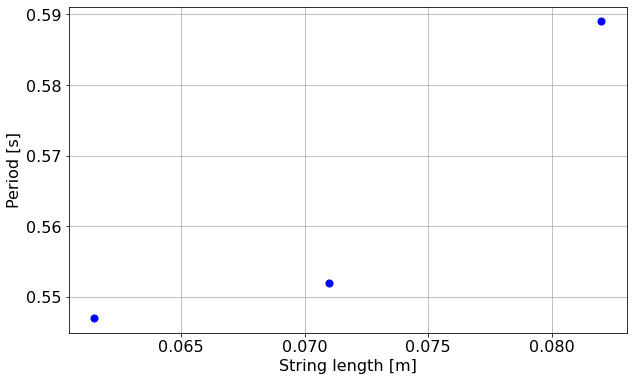

In [138]:
plt.figure(figsize=(10, 6))
plt.scatter(height_final, np.array(period_mean)/1000, s=50, color='blue');
plt.ylabel('Period [s]', fontsize=16)
plt.xlabel('String length [m]', fontsize=16)
plt.grid()
plt.savefig('period_vs_length.png', dpi=300)

Experiment 4 - Period as function of mass

In [139]:
filelist = sorted(glob.glob(experiment_4))
masses = [1, 2, 3, 4, 5]
mass_list = []
for mass in masses:
    for i in range(5):
        mass_list.append(mass)
        
mass_list= np.array(mass_list)

In [140]:
period = []
for filename in filelist:
    df = pd.read_csv(filename, sep =' ', header='infer', skiprows=10, names=['d', 'time', 'state'])
    #print(df.time[3]-df.time[1])
    period.append(df.time[10]-df.time[2])
period = np.array(period)

In [141]:
period

array([568, 551, 578, 585, 544, 535, 547, 561, 281, 286, 287, 580, 559,
       570, 578, 578, 585, 572, 590, 592, 542, 589, 590, 559, 576])

In [142]:
mass_list = np.delete(mass_list,[8,9,10])
period = np.delete(period, [8,9,10])

In [143]:
print(mass_list)
print(period)

[1 1 1 1 1 2 2 2 3 3 3 3 4 4 4 4 4 5 5 5 5 5]
[568 551 578 585 544 535 547 561 580 559 570 578 578 585 572 590 592 542
 589 590 559 576]


In [144]:
df_mass = pd.DataFrame.from_dict({'mass': mass_list, 'period': period})

In [145]:
period_mean=[]
for mass in masses:
    period_mean.append(df_mass.period[df_mass.mass==mass].mean())

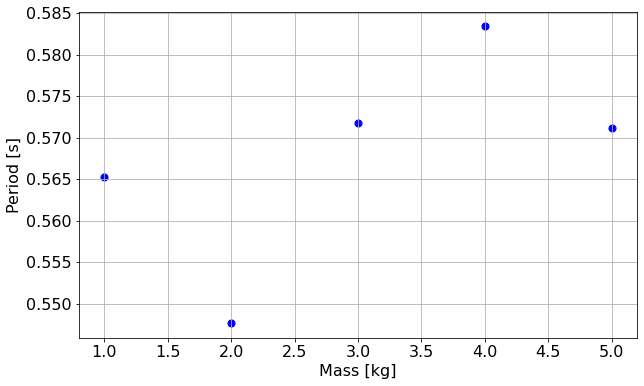

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(masses, np.array(period_mean)/1000, s=50, color='blue');
plt.ylabel('Period [s]', fontsize=16)
plt.xlabel('Mass [kg]', fontsize=16)
plt.grid()
plt.savefig('period_vs_mass.png', dpi=300)